In [1]:
!pip install seaborn

     |████████████████████████████████| 283 kB 1.0 MB/s 
You should consider upgrading via the &#39;/home/minoro/Documentos/workspace/prc/wsgi/guria/venv/bin/python -m pip install --upgrade pip&#39; command.


In [39]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../../')

import pandas as pd
import numpy as np
import nltk
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sn

from text.process import text_processor

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
    
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.utils import class_weight

from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam, SGD

from tensorflow.keras.callbacks import EarlyStopping

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:

def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    


In [2]:
RANDOM_STATE = 42
# DATAFRAME_PATH = '../../dataset/dataframe/processed/2020-10-02_dataframe_processado.csv'
DATAFRAME_PATH = '../../../dataset/dataframe/processed/2021-01-05_dataframe_processado.csv'
df = pd.read_csv(DATAFRAME_PATH) 
# df = df.reindex()

n_classes = len(df.tipo.unique())

print('Num Rows: {}'.format(len(df.index)))
print('Num Classes: {}'.format(n_classes))
# df.head(5)
df[df['modulo'] == 'operacao_credito'].sample(5)

Num Rows: 7591
Num Classes: 27


projeto  \
7422  Santa Izabel do Oeste - Operação de Crédito 18   
7430  Santa Izabel do Oeste - Operação de Crédito 18   
7531               Contenda - Operação de Crédito 15   
6853            Bom Sucesso - Operação de Crédito 12   
7521          Esperança Nova - Operação de Crédito 8   

                                                  texto  \
7422  Prefeitura do Município     Santa Izabel do Oe...   
7430  ty pr EE  z      PRI fran ur                 o...   
7531  SELDICE (LM WHEZ THA HOQUDIALINAO! ZINVIGIW “H...   
6853  PREFEITURA MUNICIPAL DE BOM SUCE: ESTADO DO PA...   
7521  ANA VAOK VÍNHASE = Lo-1000/GE TINA FAN  vi oo ...   

                                                   tipo            modulo  \
7422                  Lei abertura de crédito adicional  operacao_credito   
7430           Ata de Posse do(a) Prefeito(a) Municipal  operacao_credito   
7531  Certidão do TCE-PR – Especifica para Operação ...  operacao_credito   
6853                                   Lei Autorizadora  operacao_credito   
7521                                    Parecer Técnico  operacao_credito   

                                            texto_limpo  texto_len  \
7422  prefeitura município santa izabel oeste cnpj 2...       9431   
7430  pri fran spot org eres rpuro cpm care erro nrp...        801   
7531  seldice whez tha hoqudialinao zinvigiw hetaod ...       8562   
6853  prefeitura municipal bom suce estado parana e-...       3679   
7521  ana vaok vínhase lo-1000/ge tina fan ooo ven 0...       2207   

      texto_limpo_len  qtd_palavras_texto  qtd_palavras_texto_limpo  
7422             6965                1485                       903  
7430              421                 185                        74  
7531             6509                1445                       868  
6853             2704                 563                       320  
7521             1698                 368                       221

<AxesSubplot:>

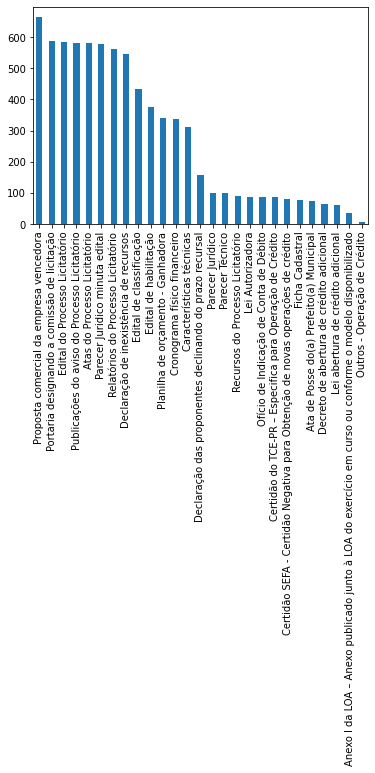

In [3]:
df_original = df.copy()


df['tipo'].value_counts().sort_values(ascending=False).plot(kind='bar')

In [5]:
df[df['texto_limpo'] == 'np.nan']

Empty DataFrame
Columns: [projeto, texto, tipo, modulo, texto_limpo, texto_len, texto_limpo_len, qtd_palavras_texto, qtd_palavras_texto_limpo]
Index: []

In [5]:
# encoder = LabelEncoder()
encoder = OneHotEncoder(sparse=False)
# X = df.texto.values.astype('U')
X = df.texto_limpo.values.astype('U')
# X = df.texto_stemmed.values.astype('U')
y = encoder.fit_transform(df.tipo.values.reshape(len(df.tipo.values), 1))
# y = encoder.fit_transform(df.tipo.values)


# vectorizer = CountVectorizer(token_pattern=r'\w{3,}')
# vectorizer =  TfidfVectorizer(analyzer='word', token_pattern=r'\w{3,}', ngram_range=(2,3), max_features=5000)
# vectorizer =  TfidfVectorizer(analyzer='word', token_pattern=r'\w{3,}', max_features=5000)
vectorizer =  TfidfVectorizer(analyzer='word', token_pattern=r'\w{3,}', max_features=1000)

vectorizer.fit( X )
X = vectorizer.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)

# X_train = X
# y_train = y

input_dim = X_train.shape[1]
print(input_dim)
print(len(df.tipo.values))
# print(df.tipo.values)
print(y.shape)


1000
7591
(7591, 27)


In [13]:

X_train.sort_indices()

print(len(y_train))
print(len(y_test))



6072
1519


In [7]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

classifier = RandomForestClassifier(n_estimators=1000, random_state=RANDOM_STATE)  
# classifier = MultinomialNB()
# classifier = SVC()
classifier.fit(X_train, y_train)

predictions = classifier.predict(X_test)
# cm = confusion_matrix(y_test, predictions)

print('Accuracy score: {:.4f}'.format(accuracy_score(y_test, predictions)))
print('Precision score: {:.4f}'.format(precision_score(y_test, predictions, average='micro')))
print('Recall score: {:.4f}'.format(recall_score(y_test, predictions, average='micro')))
# print(cm)




Accuracy score: 0.7986
Precision score: 0.9529
Recall score: 0.7986


In [25]:
def get_model(input_dim):
    model = Sequential()
    model.add(layers.Dense(8, input_dim=input_dim, activation='relu'))
    model.add(layers.Dropout(0.15))
    model.add(layers.BatchNormalization())


#     model.add(layers.Dense(16, activation='relu'))
#     model.add(layers.Dropout(0.15))
#     model.add(layers.BatchNormalization())

    # model.add(layers.Dense(32, activation='relu'))
    # model.add(layers.Dropout(0.3))
    # model.add(layers.BatchNormalization())


    # model.add(layers.Dense(64, activation='relu'))
    # model.add(layers.Dropout(0.3))
    # model.add(layers.BatchNormalization())


    # model.add(layers.Dense(64, activation='relu'))
    # model.add(layers.Dropout(0.2))
    # model.add(layers.BatchNormalization())

    # model.add(layers.Dense(128, activation='relu'))
    # model.add(layers.Dropout(0.2))
    # model.add(layers.BatchNormalization())

    # model.add(layers.Dense(128, activation='relu'))
    # model.add(layers.Dropout(0.2))
    # model.add(layers.BatchNormalization())

    # model.add(layers.Dense(256, activation='relu'))
    # model.add(layers.Dropout(0.2))
    # model.add(layers.BatchNormalization())

    # model.add(layers.Dense(512, activation='relu'))
    # model.add(layers.Dropout(0.2))
    # model.add(layers.BatchNormalization())


    model.add(layers.Dense(n_classes, activation='softmax'))
    return model


model = get_model(input_dim)
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

# optimizer = SGD(learning_rate=1.0)
# optimizer = Adam(learning_rate=0.001)
optimizer = Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['acc'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 8)                 8008      
_________________________________________________________________
dropout_3 (Dropout)          (None, 8)                 0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 8)                 32        
_________________________________________________________________
dense_7 (Dense)              (None, 27)                243       
Total params: 8,283
Trainable params: 8,267
Non-trainable params: 16
_________________________________________________________________


In [26]:
y_integers = np.argmax(y_train, axis=1)
class_weights = class_weight.compute_class_weight('balanced', np.unique(y_integers), y_integers)
d_class_weights = dict(enumerate(class_weights))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
# es = EarlyStopping(monitor='val_acc', mode='max', verbose=1, patience=5)
history = model.fit(X_train, y_train, epochs=200, validation_data=(X_test, y_test), batch_size=32, class_weight=d_class_weights, callbacks=[es])
# history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), batch_size=32, class_weight=d_class_weights)


# history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), batch_size=32, callbacks=[es])

# history = model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/200
190/190 [==============================] - 0s 2ms/step - loss: 3.2455 - acc: 0.0898 - val_loss: 3.2467 - val_acc: 0.2054
Epoch 2/200
190/190 [==============================] - 0s 1ms/step - loss: 2.9927 - acc: 0.2192 - val_loss: 3.0666 - val_acc: 0.3614
Epoch 3/200
190/190 [==============================] - 0s 1ms/step - loss: 2.8344 - acc: 0.2983 - val_loss: 2.7318 - val_acc: 0.4602
Epoch 4/200
190/190 [==============================] - 0s 1ms/step - loss: 2.7118 - acc: 0.3664 - val_loss: 2.4898 - val_acc: 0.5122
Epoch 5/200
190/190 [==============================] - 0s 1ms/step - loss: 2.6093 - acc: 0.4175 - val_loss: 2.3724 - val_acc: 0.5444
Epoch 6/200
190/190 [==============================] - 0s 1ms/step - loss: 2.5183 - acc: 0.4458 - val_loss: 2.2864 - val_acc: 0.5774
Epoch 7/200
190/190 [==============================] - 0s 1ms/step - loss: 2.4490 - acc: 0.4633 - val_loss: 2.2114 - val_acc: 0.5938
Epoch 8/200
190/190 [==============================] - 0s 1ms/step - 

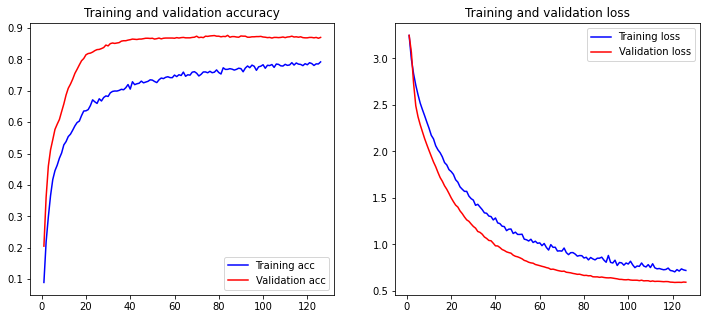

In [27]:
plot_history(history)

Acc Treino: 0.9381
Acc Teste:  0.8703


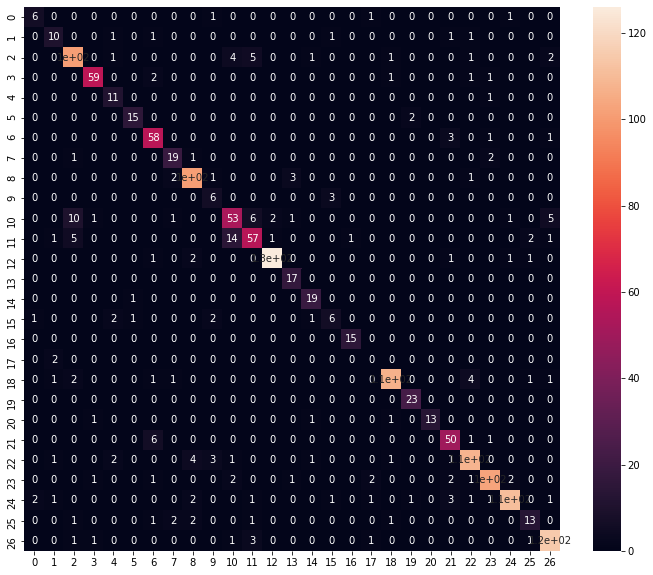

In [28]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Acc Treino: {:.4f}".format(accuracy))

loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Acc Teste:  {:.4f}".format(accuracy))


y_pred = model.predict(X_test)
cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))

# y_pred = model.predict(X_train)
# cm = confusion_matrix(y_train.argmax(axis=1), y_pred.argmax(axis=1))


df_cm = pd.DataFrame(cm)
plt.figure(figsize = (12, 10))
sn.heatmap(df_cm, annot=True)
plt.show()

In [30]:
from sklearn.metrics import classification_report,precision_score

labels = [label[:25] for label in list(df.tipo.unique())]

y_true = y_test.argmax(axis=1)
# y_pred = y_pred.argmax(axis=1)
print(classification_report(y_true, y_pred.argmax(axis=1) , target_names=labels))

                           precision    recall  f1-score   support

Portaria designando a com       0.67      0.67      0.67         9
Edital do Processo Licita       0.62      0.67      0.65        15
Publicações do aviso do P       0.83      0.87      0.85       116
Atas do Processo Licitató       0.94      0.92      0.93        64
Declaração das proponente       0.65      0.92      0.76        12
Relatórios do Processo Li       0.88      0.88      0.88        17
    Edital de habilitação       0.82      0.92      0.87        63
  Edital de classificação       0.76      0.83      0.79        23
Parecer Juridico minuta e       0.90      0.94      0.92       108
Declaração de inexistênci       0.46      0.67      0.55         9
Recursos do Processo Lici       0.71      0.66      0.68        80
Proposta comercial da emp       0.78      0.70      0.74        82
Cronograma físico finance       0.98      0.95      0.97       132
Planilha de orçamento - G       0.77      1.00      0.87     

In [160]:
index_test = 123
X_valid = df.iloc[index_test].texto_limpo
X_valid = vectorizer.transform([X_valid])

predicted = model.predict(X_valid)
print(predicted)
print(predicted[0].max())
print(predicted[0][predicted[0].argmax(axis=-1)])

print(predicted.argmax(axis=-1))
print( encoder.inverse_transform(predicted) )
print( encoder.inverse_transform( np.array(predicted[0]).reshape(1, -1) )[0][0] )

print(df.iloc[index_test].tipo)

[[2.32152001e-06 9.94200704e-08 6.97848224e-09 6.14787126e-03
  1.00010205e-08 4.67025139e-08 1.41929937e-04 3.23840538e-10
  2.35657782e-09 6.28624264e-10 3.27964904e-06 1.36598637e-05
  4.83103286e-05 9.84995306e-01 6.90998649e-03 1.72961655e-03
  5.06907054e-06 3.16743645e-08 2.19434105e-06 1.73880996e-11
  3.21837661e-07 4.87803469e-08]]
0.9849953
0.9849953
[13]
[['Ofício de Indicação de Conta de Débito']]
Ofício de Indicação de Conta de Débito
Ofício de Indicação de Conta de Débito


In [31]:

tipos = sorted(df.tipo.unique())

i = 0
for tipo in sorted(tipos):
    print('{} - {}'.format(i, tipo))
    encode = encoder.transform( np.array([tipo]).reshape(1, -1) )
    print(encode[0])
    i += 1


0 - Anexo I da LOA – Anexo publicado junto à LOA do exercício em curso ou conforme o modelo disponibilizado
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0.]
1 - Ata de Posse do(a) Prefeito(a) Municipal
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0.]
2 - Atas do Processo Licitatório
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0.]
3 - Características técnicas
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0.]
4 - Certidão SEFA - Certidão Negativa para Obtenção de novas operações de crédito
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0.]
5 - Certidão do TCE-PR – Especifica para Operação de Crédito
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0.]
6 - Cronograma físico financeiro
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0.]
7 - Declaração das pr

In [ ]:
import pickle
# pickle.dump(vectorizer.vocabulary_, open("operacao_credito_processo_licitatorio_juridico.pkl", "wb"))
# vectorizer.vocabulary_

# model.save_weights('tiny_rna.h5')

encoder.categories_
pickle.dump(encoder.categories_, open("classes_operacao_credito_processo_licitatorio_juridico.pkl", "wb"))

In [203]:

tipo = 'Recursos do Processo Licitatório'
len(df[df['tipo'] == tipo].index)
df_tipo = df[df['tipo'] == tipo]

for i in range(len(df_tipo.index)):
    print('{} Proj: {}'.format(i, df_tipo.iloc[i].projeto))
    print(df_validation.iloc[i].texto)

# df[(df['tipo'] == tipo ) & (df['projeto'] == 'Alto Paraíso - proj 39 - processo 1')].iloc[0].texto

0 Proj: Mandirituba - proj 33 - processo 1
Município de Bandeirantes - 2020 Relação de Participantes                 Pregão 15/2020 TE CRESCE Temer Ea a coleta sena esmesemim enceneçasEoupaNENTOS LIDA ssa emas veins. conençio De mequmaseneu  oxsitariccáros. ou2     Cote do aecnrs. cap        EEE EE NACOS DE NONE RT EEE 
1 Proj: Santa Cruz do Monte Castelo - proj 51 - processo 1
MUNICIPIO DE CAMPO MOURÃO ESTADO DO PARANÁ SECRETARIA DA FAZENDA E ADMINISTRAÇÃO DEPARTAMENTO DE SUPRIMENTOS     CONCORRÊNCIA PÚBLICA N. 002/2020 PROCESSO LICITATÓRIO N. 110/2020 - DESUP PROCESSO DIGITAL N. 5257/2020  TIPO: MENOR PREÇO           OBJETO: CONTRATAÇÃO DE EMPRESA PARA EXECUÇÃO DE PAVIMENTAÇÃO DE VIAS URBANAS EM CBUQ COM ÁREA TOTAL DE 20.066,17M* EM DIVERSOS TRECHOS DO JARDIM SILVANA INCLUINDO SERVIÇOS PRELIMINARES, TERRAPLANAGEM, BASE E SUB-BASE, REVESTIMENTO, MEIOS FIOS E SARJETA, PAISAGISMO E URBANISMO, SINALIZAÇÃO DE TRÂNSITO, DRENAGEM, ENSAIOS TECNOLÓGICOS E PLACAS DE COMUNICAÇÃO VISUAL. SECRETA

In [38]:
X_valid.sort_indices()

tipo = 'Atas do Processo Licitatório'

df_validation = df[df['tipo'] == tipo]

textos = df_validation.texto_limpo.values.astype('U') 

for i in range(len(df_validation.index)):
    
    X_valid = textos[i]
    X_valid = vectorizer.transform([X_valid])

    predicted = model.predict(X_valid)
    label_predicted = encoder.inverse_transform( np.array(predicted[0]).reshape(1, -1) )[0][0]
    label_expected = df_validation.iloc[i].tipo
    
    if label_predicted != label_expected:
        print('{} Proj: {} - Predicted: {} - Expected: {}'.format(i, df_validation.iloc[i].projeto, label_predicted, label_expected))
        print(df_validation.iloc[i].texto)
        print('\n')
        

InvalidArgumentError: indices[1] = [0,984] is out of order. Many sparse ops require sorted indices.
    Use `tf.sparse.reorder` to create a correctly ordered copy.

 [Op:SerializeManySparse]

In [37]:
X_valid.sort_indices()



In [278]:

# df[(df['projeto'] == 'Paula Freitas - proj 34 - processo 1') 
#    & (df['tipo'] == 'Declaração das proponentes declinando do prazo recursal')]

# df[(df['projeto'] == 'Santa Izabel do Oeste - Operação de Crédito 19')]

import process_dataframe

# df_processed = process_dataframe.load_all_dataframes(ignore_errors=True)

# df_processed[df_processed['projeto'] == 'Sabáudia - Operação de Crédito 16'].head()

# df[df['projeto'] == 'Sabáudia - Operação de Crédito 16']

df_raw = process_dataframe.load_all_dataframes()
# df_raw[df['projeto'] == 'Vera Cruz do Oeste - proj 23 - processo 1']


# df_processed[(df_processed['modulo'] == 'operacao_credito')
#              & (df_processed['projeto'] == 'Almirante Tamandaré - Operação de Crédito 19')].any().any()

# df_processed.index


# df[df['modulo'] == 'operacao_credito']['projeto'].unique().tolist()

df_raw['modulo'].unique()


ERROR:root:[process_dataframe][load_dataframe] ../../dataset/dataframe/train
Traceback (most recent call last):
  File "/home/cti/workspace/cls_documento/src/utils/process_dataframe.py", line 95, in load_dataframes_in_dir
    df = pd.concat(dataframes, ignore_index=True, sort=False)
  File "/home/cti/anaconda3/lib/python3.7/site-packages/pandas/core/reshape/concat.py", line 281, in concat
    sort=sort,
  File "/home/cti/anaconda3/lib/python3.7/site-packages/pandas/core/reshape/concat.py", line 329, in __init__
    raise ValueError("No objects to concatenate")
ValueError: No objects to concatenate
ERROR:root:[process_dataframe][load_dataframe]
Traceback (most recent call last):
  File "/home/cti/workspace/cls_documento/src/utils/process_dataframe.py", line 69, in load_all_dataframes
    dataframes.append(load_dataframes_in_dir(path, ignore_errors=ignore_errors))
  File "/home/cti/workspace/cls_documento/src/utils/process_dataframe.py", line 95, in load_dataframes_in_dir
    df = pd.con

array(['modulo', 'operacao_credito', 'qtd_palavras_texto_limpo', ...,
       '7914', '9402', '1810'], dtype=object)

In [230]:
from sklearn.model_selection import KFold

acc_per_fold = []
loss_per_fold = []

kfold = KFold(n_splits=10, shuffle=True)
fold_no = 1
for train, test in kfold.split(X, y):

    model = get_model(input_dim)
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')

    # Fit data to model
    history = model.fit(X[train], y[train],
              batch_size=32,
              epochs=50,
              verbose=1)

    # Generate generalization metrics
    scores = model.evaluate(X[test], y[test], verbose=0)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])

    # Increase fold number
    fold_no = fold_no + 1

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/50
5553/5553 [==============================] - 1s 242us/step - loss: 2.0828 - accuracy: 0.5163
Epoch 2/50
5553/5553 [==============================] - 0s 77us/step - loss: 1.2321 - accuracy: 0.7281
Epoch 3/50
5553/5553 [==============================] - 0s 77us/step - loss: 0.9004 - accuracy: 0.7765
Epoch 4/50
5553/5553 [==============================] - 0s 79us/step - loss: 0.7378 - accuracy: 0.8106
Epoch 5/50
5553/5553 [==============================] - 0s 77us/step - loss: 0.6206 - accuracy: 0.8383
Epoch 6/50
5553/5553 [==============================] - 0s 87us/step - loss: 0.5612 - accuracy: 0.8502
Epoch 7/50
5553/5553 [==============================] - 1s 119us/step - loss: 0.5136 - accuracy: 0.8558
Epoch 8/50
5553/5553 [==============================] - 0s 77us/step - loss: 0.4968 - accuracy: 0.8604
Epoch 9/50
5553/5553 [==============================] - 0s 77us/step - loss: 

5554/5554 [==============================] - 1s 117us/step - loss: 0.3173 - accuracy: 0.9013
Epoch 28/50
5554/5554 [==============================] - 1s 118us/step - loss: 0.2908 - accuracy: 0.9102
Epoch 29/50
5554/5554 [==============================] - 1s 99us/step - loss: 0.3160 - accuracy: 0.9048
Epoch 30/50
5554/5554 [==============================] - 1s 101us/step - loss: 0.2985 - accuracy: 0.9087
Epoch 31/50
5554/5554 [==============================] - 1s 116us/step - loss: 0.2965 - accuracy: 0.9057
Epoch 32/50
5554/5554 [==============================] - 1s 117us/step - loss: 0.2992 - accuracy: 0.9071
Epoch 33/50
5554/5554 [==============================] - 0s 83us/step - loss: 0.3013 - accuracy: 0.9042
Epoch 34/50
5554/5554 [==============================] - 1s 93us/step - loss: 0.2975 - accuracy: 0.9087
Epoch 35/50
5554/5554 [==============================] - 0s 85us/step - loss: 0.2995 - accuracy: 0.9042
Epoch 36/50
5554/5554 [==============================] - 1s 121us/step 

5554/5554 [==============================] - 0s 76us/step - loss: 1.2419 - accuracy: 0.7236
Epoch 3/50
5554/5554 [==============================] - 0s 76us/step - loss: 0.9314 - accuracy: 0.7821
Epoch 4/50
5554/5554 [==============================] - 0s 75us/step - loss: 0.7565 - accuracy: 0.8192
Epoch 5/50
5554/5554 [==============================] - 0s 75us/step - loss: 0.6682 - accuracy: 0.8374
Epoch 6/50
5554/5554 [==============================] - 0s 78us/step - loss: 0.6096 - accuracy: 0.8432
Epoch 7/50
5554/5554 [==============================] - 0s 77us/step - loss: 0.5587 - accuracy: 0.8480
Epoch 8/50
5554/5554 [==============================] - 0s 76us/step - loss: 0.5171 - accuracy: 0.8597
Epoch 9/50
5554/5554 [==============================] - 0s 75us/step - loss: 0.4800 - accuracy: 0.8671
Epoch 10/50
5554/5554 [==============================] - 0s 76us/step - loss: 0.4598 - accuracy: 0.8666
Epoch 11/50
5554/5554 [==============================] - 0s 76us/step - loss: 0.427

5554/5554 [==============================] - 1s 114us/step - loss: 0.7836 - accuracy: 0.7931
Epoch 5/50
5554/5554 [==============================] - 1s 114us/step - loss: 0.6566 - accuracy: 0.8311
Epoch 6/50
5554/5554 [==============================] - 1s 113us/step - loss: 0.5953 - accuracy: 0.8412
Epoch 7/50
5554/5554 [==============================] - 1s 109us/step - loss: 0.5362 - accuracy: 0.8581
Epoch 8/50
5554/5554 [==============================] - 1s 115us/step - loss: 0.5036 - accuracy: 0.8597
Epoch 9/50
5554/5554 [==============================] - 1s 115us/step - loss: 0.4870 - accuracy: 0.8680
Epoch 10/50
5554/5554 [==============================] - 1s 116us/step - loss: 0.4456 - accuracy: 0.8745
Epoch 11/50
5554/5554 [==============================] - 1s 116us/step - loss: 0.4300 - accuracy: 0.8817
Epoch 12/50
5554/5554 [==============================] - 1s 115us/step - loss: 0.4143 - accuracy: 0.8810
Epoch 13/50
5554/5554 [==============================] - 1s 111us/step -

5554/5554 [==============================] - 0s 80us/step - loss: 0.6480 - accuracy: 0.8430
Epoch 6/50
5554/5554 [==============================] - 0s 79us/step - loss: 0.5777 - accuracy: 0.8527
Epoch 7/50
5554/5554 [==============================] - 0s 79us/step - loss: 0.5296 - accuracy: 0.8563
Epoch 8/50
5554/5554 [==============================] - 0s 84us/step - loss: 0.4895 - accuracy: 0.8711
Epoch 9/50
5554/5554 [==============================] - 0s 75us/step - loss: 0.4650 - accuracy: 0.8749
Epoch 10/50
5554/5554 [==============================] - 0s 75us/step - loss: 0.4444 - accuracy: 0.8774
Epoch 11/50
5554/5554 [==============================] - 0s 75us/step - loss: 0.4159 - accuracy: 0.8808
Epoch 12/50
5554/5554 [==============================] - 0s 77us/step - loss: 0.4271 - accuracy: 0.8752
Epoch 13/50
5554/5554 [==============================] - 0s 76us/step - loss: 0.3896 - accuracy: 0.8873
Epoch 14/50
5554/5554 [==============================] - 0s 75us/step - loss: 0.

In [231]:
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
    print('------------------------------------------------------------------------')
    print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
    
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Loss: 0.3180500027817044 - Accuracy: 93.68932247161865%
------------------------------------------------------------------------
> Fold 2 - Loss: 0.4503237330015127 - Accuracy: 90.59967398643494%
------------------------------------------------------------------------
> Fold 3 - Loss: 0.42669575055834735 - Accuracy: 90.43760299682617%
------------------------------------------------------------------------
> Fold 4 - Loss: 0.46138825671478645 - Accuracy: 91.89627170562744%
------------------------------------------------------------------------
> Fold 5 - Loss: 0.29310370061540525 - Accuracy: 92.7066445350647%
------------------------------------------------------------------------
> Fold 6 - Loss: 0.3032766270120681 - Accuracy: 92.54456758499146%
----------------------------------------------------------------------